In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

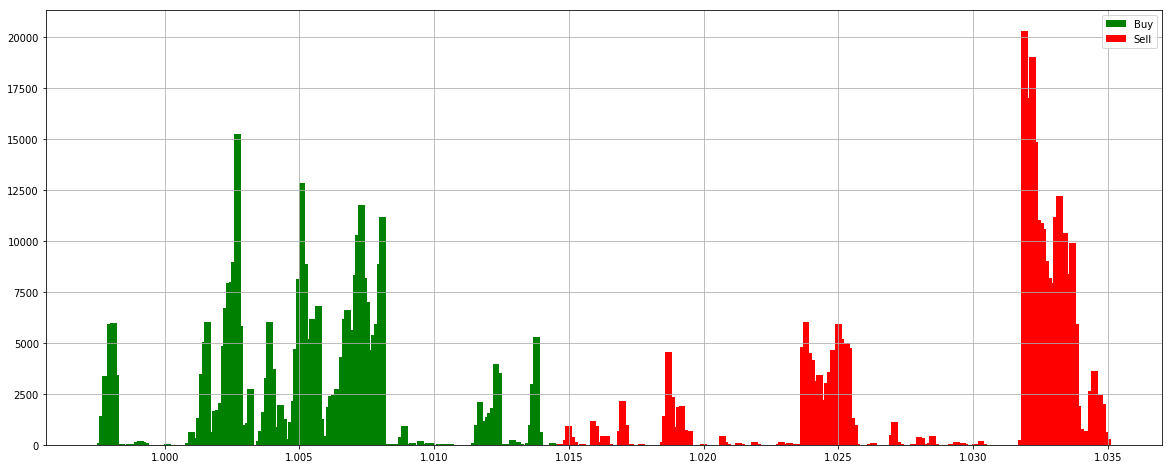

Best Bid:  1.0146
Best Ask:  1.0147


In [4]:
snapshot = pd.read_csv("snapshot.csv", header=None, error_bad_lines=False, warn_bad_lines=False)

bid = snapshot[snapshot[0] == 0]
ask = snapshot[snapshot[0] == 1]

_, ax = plt.subplots(figsize=(20,8))
ax.grid()

ax.bar(bid[1], bid[2], 0.00025, color='green', label='Buy')
ax.bar(ask[1], ask[2], 0.00025, color='red', label='Sell')
ax.legend(loc=0)
plt.show()

print "Best Bid: ", max(bid[1])
print "Best Ask: ", min(ask[1])

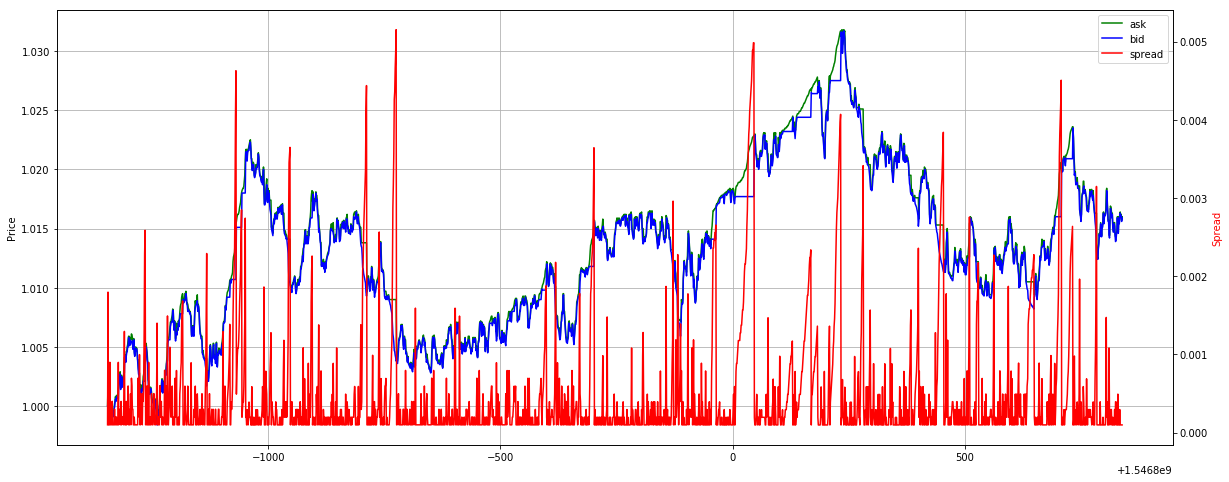

In [5]:
feed = pd.read_csv("feed.csv", header=None, error_bad_lines=False, warn_bad_lines=False) #parse_dates=[0]
feed.sort_values([0], inplace=True)
t = feed[0]
bid = feed[1]
ask = feed[2]
spread = (ask - bid)/ask
fig, ax1 = plt.subplots(figsize=(20,8))
ax2 = ax1.twinx()
ax1.grid()
ax1.plot(t, ask, color='green', label='ask')
ax1.plot(t, bid, color='blue', label='bid')
ax1.plot(np.nan, color='red', label='spread')
ax1.set_ylabel(ylabel='Price')

ax1.legend(loc=0)

ax2.plot(t, spread, color='red', label='spread')
ax2.set_ylabel(ylabel='Spread', color='red')

plt.show()